# Random Forest Hyperparameter Tuning

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


Wrong data types for some of the fields like Postcode, Date, Bathroom, Car, etc.

In [5]:
df['Postcode'] = df['Postcode'].astype('object')

In [6]:
df['Propertycount'] = df['Propertycount'].astype('object')

From looking at the description of Rooms and Bedroom2, they seem to be very similar - deduced by looking at the mean, std, 25%, 50%, 75%.

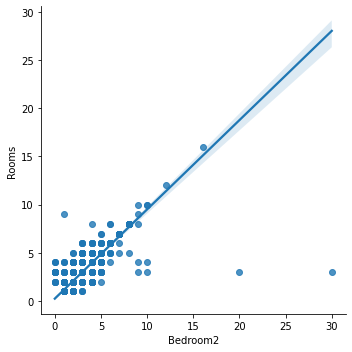

In [7]:
sns.lmplot(data=df, x="Bedroom2", y="Rooms")

The relationship is almost perfectly linear; they are almost a perfect match when not considering some of the extreme values. Bedroom2 will not provide additional information that Rooms does not already provide and including extra fields in our model will increase the risk of overfitting.

In [8]:
df = df.drop("Bedroom2", axis=1)

There are also other strange observations, for example there are some houses with no bathrooms and there are some with 12 - this could be for numerous reasons but it is best to check just to be sure.

In [9]:
df['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
12.0        1
9.0         1
Name: Bathroom, dtype: int64

In [10]:
df[['Bathroom','YearBuilt']][df['Bathroom'] == 0]

,Bathroom,YearBuilt
228,0.0,NaN
481,0.0,NaN
845,0.0,NaN
1009,0.0,NaN
1549,0.0,NaN
1772,0.0,NaN
1784,0.0,NaN
2716,0.0,1935.0
2853,0.0,NaN
3717,0.0,NaN


This shows that houses without bathrooms are really old as they are either built before 1980 or have no data on when they were built. Will refrain from removing these cases.

Now to check houses which have more than 6 bathrooms

In [11]:
df.loc[df['Bathroom'] > 6]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
175,Albert Park,143 Kerferd Rd,7,h,NaN,SN,hockingstuart,24/09/2016,3.3,3206.0,7.0,0.0,435.0,NaN,NaN,Port Phillip City Council,-37.84730,144.95390,Southern Metropolitan,3280.0
616,Ashburton,115 Ashburn Gr,8,h,2950000.0,S,hockingstuart,10/09/2016,11.0,3147.0,7.0,4.0,1472.0,618.0,2009.0,Boroondara City Council,-37.87290,145.07880,Southern Metropolitan,3052.0
1004,Balwyn,29 Sevenoaks St,5,h,3900000.0,PI,Jellis,28/08/2016,9.7,3103.0,7.0,6.0,0.0,NaN,NaN,Boroondara City Council,-37.80490,145.07480,Southern Metropolitan,5682.0
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125.0,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678.0
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072.0,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577.0
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124.0,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920.0
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125.0,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678.0
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132.0,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871.0
30129,Brighton East,11 Summerhill Rd,5,h,NaN,VB,Marshall,9/12/2017,10.3,3187.0,7.0,2.0,650.0,117.0,1930.0,Bayside City Council,-37.91794,145.01271,Southern Metropolitan,6938.0


In [12]:
df = df[~(df['BuildingArea'] < 1)] 

In [13]:
df['BuildingArea'].replace(44515.0, 445, inplace=True)

In [14]:
df['YearBuilt'].replace([2106, 2019], [2016, 2018], inplace=True)

In [15]:
df = df.reset_index()

## Data Cleaning

In [16]:
df.isnull().sum()

index                0
Suburb               0
Address              0
Rooms                0
Type                 0
Price             7594
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8726
Landsize         11790
BuildingArea     21115
YearBuilt        19304
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

Many of the variables suffer from missing values. Building area is the most affected by them. I would like to explore it's relationship with price and at the same time evaluate whether it is better to impute the missing values with their mean or median.

In [17]:
PWMean = df['Price'].fillna(df['Price'].mean())
PWMedian = df['Price'].fillna(df['Price'].median())

BWMean = df['BuildingArea'].fillna(df['BuildingArea'].mean())
BWMedian = df['BuildingArea'].fillna(df['BuildingArea'].median())

In [18]:
missVIDsJoint = df['Price'].isnull() | df['BuildingArea'].isnull()

In [19]:
# create a dictionary to indicate different colors, missing values will be orange
colorChoiceDict = {True: (1.0, 0.55, 0.0, 1.0), False: (0.11, 0.65, 0.72, 0.1)}

# create a column with color values using list comprehension
colorCol = [colorChoiceDict[val] for val in missVIDsJoint]

Text(0, 0.5, 'Price')

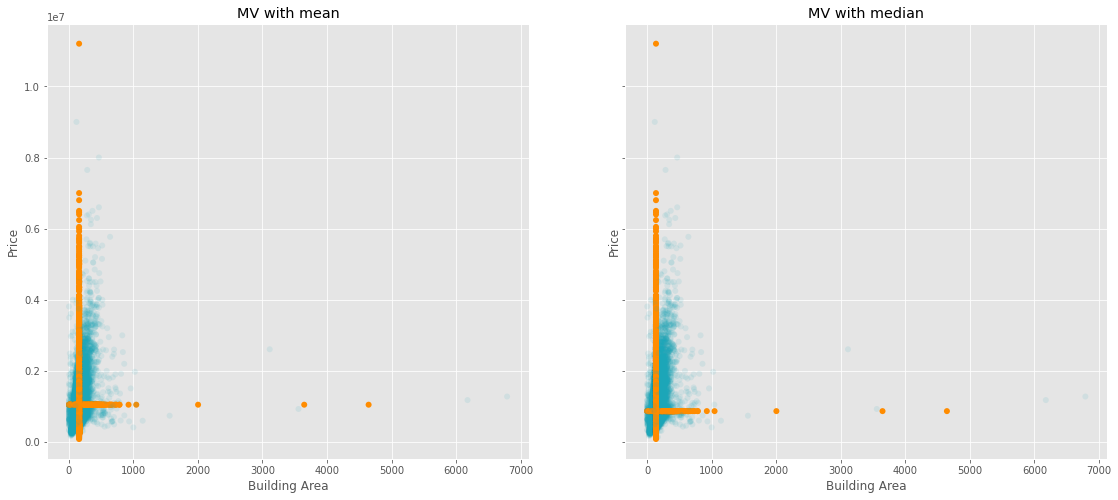

In [20]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(19, 8))
ax1.scatter(BWMean, PWMean, c = colorCol, linewidth=0)
ax1.set_title('MV with mean')
ax1.set_xlabel('Building Area')
ax1.set_ylabel('Price')
ax2.scatter(BWMedian, PWMedian, c = colorCol, linewidth=0)
ax2.set_title('MV with median')
ax2.set_xlabel('Building Area')
ax2.set_ylabel('Price')

In both graphs we can see where the imputed values would be. 

There is not a striking visual difference between the two graphs. However, after a careful look we can say that Price has a lot of outliers, and the median is less affected by them, as the horizontal line in the graph on the right is lower. In any case, considering the heavy presence of outliers, I think that in both cases it would be better to use the median, as the mean values are more sensitive to outliers. Another possible option - to guard against outliers - would be to use robust statistics. In the next cell I am going to impute all numerical variables with the median.

In [21]:
df['Price']= df['Price'].fillna(df['Price'].median())
df['Landsize']= df['Landsize'].fillna(df['Landsize'].median())
#Similarly, fill the only missing value of  all the other numeric values
df['Distance'] = df['Distance'].fillna(df['Distance'].median())
df['BuildingArea']= df['BuildingArea'].fillna(df['BuildingArea'].median())
df['Lattitude']= df['Lattitude'].fillna(df['Lattitude'].median())
df['Longtitude']= df['Longtitude'].fillna(df['Longtitude'].median())
df['YearBuilt']= df['YearBuilt'].fillna(df['YearBuilt'].median())
df.isnull().sum()

index               0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            1
Bathroom         8226
Car              8726
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         3
Lattitude           0
Longtitude          0
Regionname          3
Propertycount       3
dtype: int64

In [22]:
df['Bathroom']= df['Bathroom'].fillna(df['Bathroom'].mode()[0])
df['Car']= df['Car'].fillna(df['Car'].mode()[0])
df['CouncilArea']= df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])
df['Regionname']= df['Regionname'].fillna(df['Regionname'].mode()[0])
df['Propertycount']= df['Propertycount'].fillna(df['Propertycount'].mode()[0])
df['Postcode']= df['Postcode'].fillna(df['Postcode'].mode()[0])
df.isnull().sum()

index            0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

After dealing with null values, Bathroom and Car can now be changed to Integer:

In [23]:
df['Bathroom'] = pd.to_numeric(df['Bathroom']).round(0).astype(int)
df['Car'] = pd.to_numeric(df['Car']).round(0).astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          34780 non-null  int64  
 1   Suburb         34780 non-null  object 
 2   Address        34780 non-null  object 
 3   Rooms          34780 non-null  int64  
 4   Type           34780 non-null  object 
 5   Price          34780 non-null  float64
 6   Method         34780 non-null  object 
 7   SellerG        34780 non-null  object 
 8   Date           34780 non-null  object 
 9   Distance       34780 non-null  float64
 10  Postcode       34780 non-null  float64
 11  Bathroom       34780 non-null  int32  
 12  Car            34780 non-null  int32  
 13  Landsize       34780 non-null  float64
 14  BuildingArea   34780 non-null  float64
 15  YearBuilt      34780 non-null  float64
 16  CouncilArea    34780 non-null  object 
 17  Lattitude      34780 non-null  float64
 18  Longti

## Outliers

In [25]:
df["isOutlierPrice"] = 0 
df["isOutlierDistance"] = 0

# save the mean and standard deviation in variables
meanPrice = df['Price'].mean()
stdDevPrice = df['Price'].std()

meanDistance = df['Distance'].mean()
stdDevDistance = df['Distance'].std()

#mark outliers as 
df['isOutlierPrice'] = np.where(abs(df['Price'] - meanPrice) > 5 * stdDevPrice, 1, 0)
df['isOutlierDistance'] = np.where(abs(df['Distance'] - meanDistance) > 5 * stdDevDistance, 1, 0)

In [26]:
#create a function to compute the percentage of missing values
def percent(nom, denom):
    res= (nom*100)/denom
    print("Percentage of missing values: %.3f%%" % round(res,3))

#percentage of MV for Price
percent(df["isOutlierPrice"].value_counts()[1], df["isOutlierPrice"].value_counts()[0])   

Percentage of missing values: 0.465%


In [27]:
#percentage of MV for Landsize
percent(df["isOutlierDistance"].value_counts()[1], df["isOutlierDistance"].value_counts()[0])   

Percentage of missing values: 0.196%


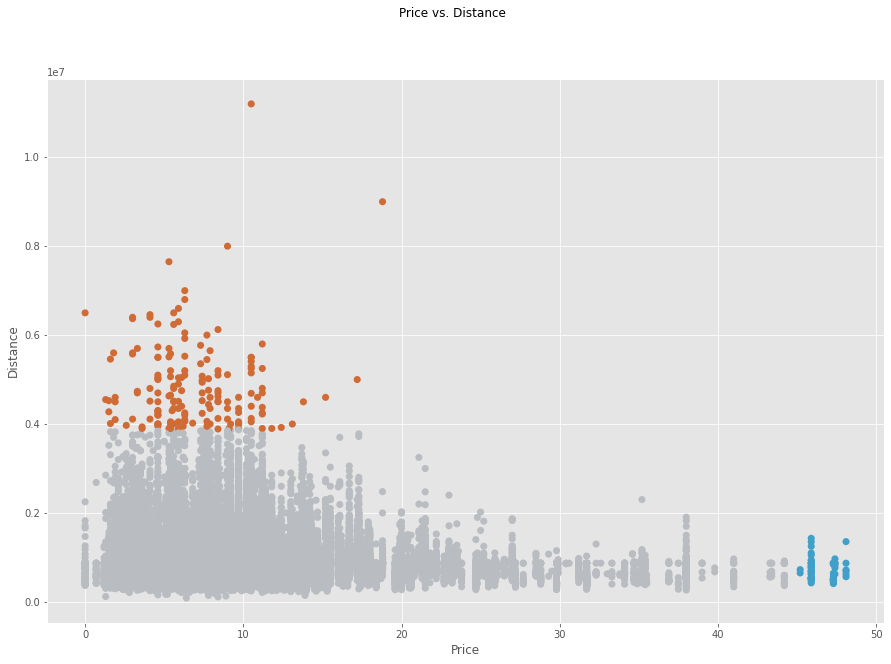

In [28]:
# This part helps us to generate a color array with different colors for the 1D outliers we compute

# first create an empty list
colorColumn = []
# we make use of the HEX color codes to use nicely distinguisable colors
for i in range(len(df)):
    if df["isOutlierPrice"][i]== 1:
        colorColumn.append("#D06B36") # orange color
    elif df["isOutlierDistance"][i] == 1:
        colorColumn.append("#40A0C9") # a blueish color
    else:
        colorColumn.append("#B9BCC0") # gray

plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.suptitle('Price vs. Distance')
plt.ylabel('Distance')
plt.scatter(df.Distance, df.Price , c = colorColumn, s = 50, linewidth=0)

The previous visualization was a simple 1D outlier measure: each point was either an outlier either for price or distance. But what about those points that are 2D outliers, that is on the edge of the distribution for both variables? In order to detect those points we need high-dimensional methods. Mahalanobis distance is one such measure, which will help to realize our next graph.

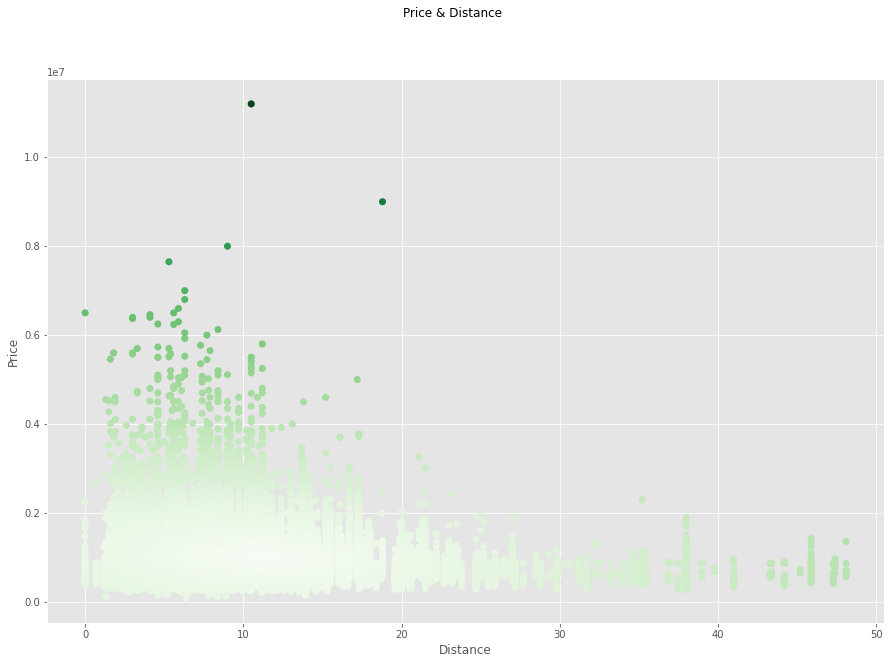

In [29]:
# We now get a part of the data frame as a numpy matrix to use in scipy
df.dropna()
columnValues = df[["Price", "Distance"]].values

# In order to generate a "mean vector", we use the mean values already computed above.
# Notice that we make use of the reshape() function to get the mean vector in a compatible shape
# as the data values.
meanVector = np.asarray([meanPrice, meanDistance]).reshape(1,2)

# We make us of the scipy function which does the computations itself.
# Alternatively, one can provide a covariance matrix that is computed outside as a parameter.
# In cases where robustness of the covariance matrix is the issue, this can be a good option.

# first import the spatial subpackage from scipy
from scipy import spatial
mahalanobisDistances = spatial.distance.cdist(columnValues, meanVector, 'mahalanobis')[:,0]

# We create a new figure where we use a color mapping and use the computed mahalanobis distances 
# as the mapping value
plt.figure(figsize=(15,10))
plt.xlabel('Distance')
plt.suptitle('Price & Distance')
plt.ylabel('Price')
plt.scatter(df.Distance, df.Price , c = mahalanobisDistances, cmap = plt.cm.Greens, s = 50, linewidth=0)

We can see that more "central" points have a low Mahalanobis distance (white points), while those on the outskirts have more saturated colors, i.e., higher distance to the centre. In this plot, the only clear 2D outliers are the dark points on the top left corner. Notice that Mahalanobis distance is particularly suited for elliptical relationship between variables (and this is not one of them). In any case is a nice visual method to identify groups of potentially interesting outliers.

## Feature Engineering

In [30]:
from dateutil.parser import parse
from datetime import datetime
from scipy.stats import norm

import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

In [31]:
df['houseAge'] = 2018 - df.YearBuilt

In [32]:
#create the new column data restructuring the original Date column with pd.to_datetime
df['data'] = pd.to_datetime(df['Date'])

In [33]:
# calculate day of year
df['doy'] = df['data'].dt.dayofyear
# Create year
df['Year'] = df['data'].dt.year

#to divide by season it's better to use the day of the year instead of the months
spring = range(80, 172)
summer = range(172, 264)
fall = range(264, 355)
# winter = everything else

daje = []
for i in df['doy']:
    if i in spring:
        season = 'spring'
    elif i in summer:
        season = 'summer'
    elif i in fall:
        season = 'fall'
    else:
        season = 'winter'
    daje.append(season)   

#add the resulting column to the dataframe (after transforming it as a Series)
df['season']= pd.Series(daje)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34780 entries, 0 to 34779
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              34780 non-null  int64         
 1   Suburb             34780 non-null  object        
 2   Address            34780 non-null  object        
 3   Rooms              34780 non-null  int64         
 4   Type               34780 non-null  object        
 5   Price              34780 non-null  float64       
 6   Method             34780 non-null  object        
 7   SellerG            34780 non-null  object        
 8   Date               34780 non-null  object        
 9   Distance           34780 non-null  float64       
 10  Postcode           34780 non-null  float64       
 11  Bathroom           34780 non-null  int32         
 12  Car                34780 non-null  int32         
 13  Landsize           34780 non-null  float64       
 14  Buildi

In [35]:
train_set, test_set = train_test_split(df, test_size=0.33, random_state=42)
housing = train_set.copy()

##  Visualisations

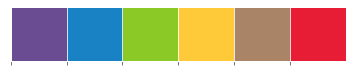

In [36]:
#create my palette
myPal = ["#6a4c93", "#1982c4", "#8ac926", "#ffca3a", "#a98467", "#e71d36"]
sns.set_palette(myPal)
sns.palplot(sns.color_palette())

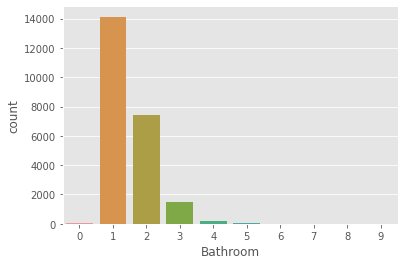

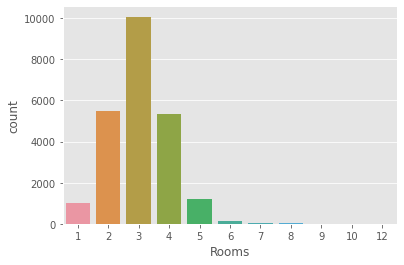

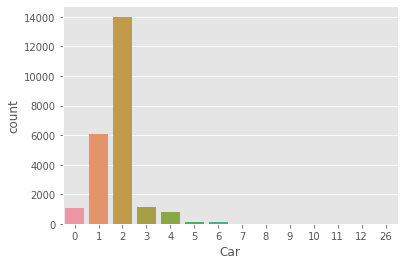

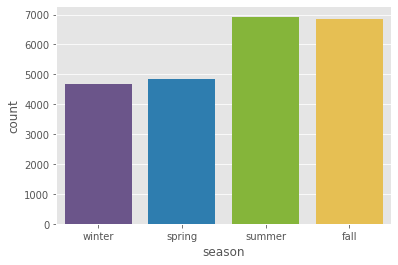

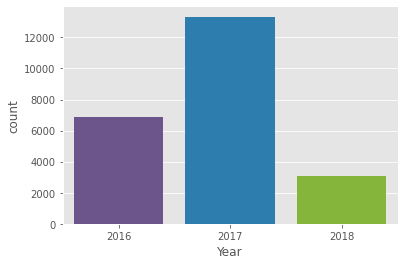

In [37]:
l= ['Bathroom', 'Rooms', 'Car', 'season', 'Year']
for i in l:
    plt.figure()
    sns.countplot(x=i, data=housing)

Insights:

- most properties were sold on 2017;
- More properties are sold during summer and fall;
- most houses have space for 2 cars;
- between 2 to four rooms and 1 or 2 bathrooms;

Now I'll take a look at the distribution of continous variables using histograms

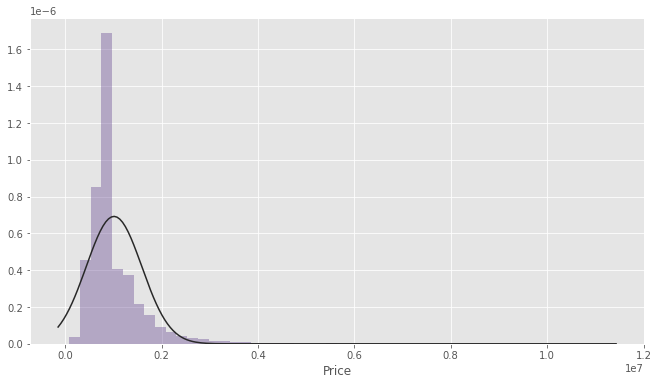

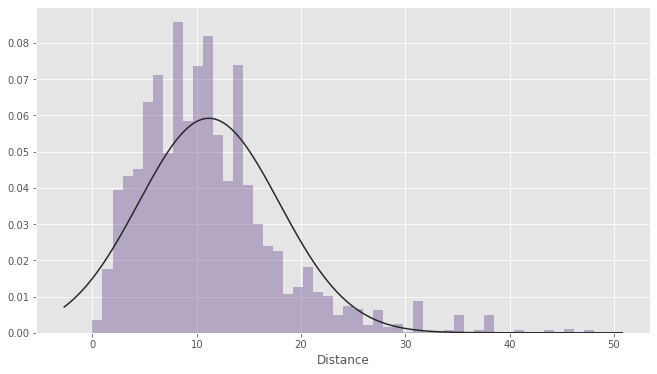

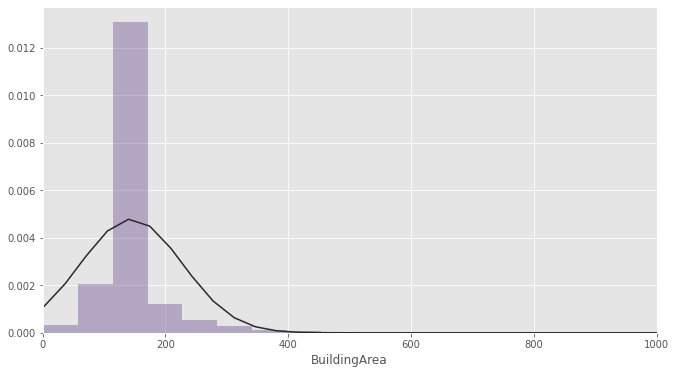

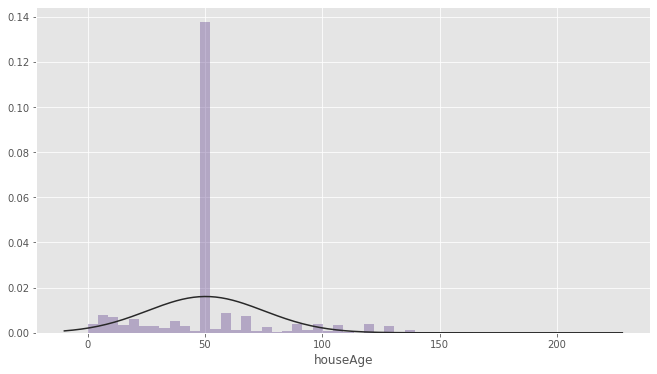

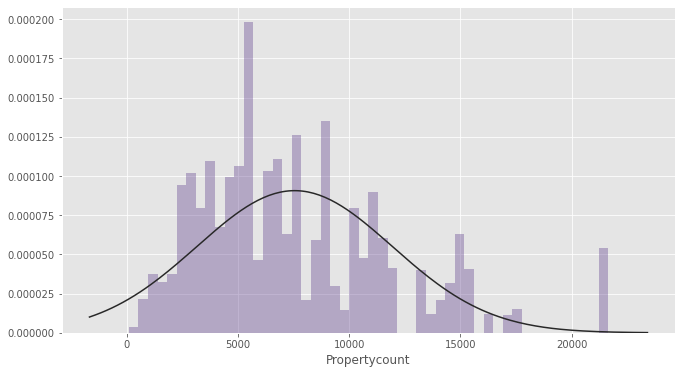

In [38]:
l= [housing['Price'], housing['Distance'], housing['BuildingArea'], housing['houseAge'], housing['Propertycount']]
count = 1
for i in l:
    plt.figure(figsize=(11,6))
    if count == 3: 
        sns.distplot(i, fit=norm, bins=120, kde=False)
        plt.xlim(0,1000)
    else:
        sns.distplot(i, fit=norm, kde=False)
    count += 1

Biggest insight here is that all variables have a different scale, there are many outliers for most of them and no one seem really close to normality. These observations will come useful later when I will scale my features.

Now let us check some variables that may influence our dependent variable price.

Text(0.5, 1.0, 'Rooms & Price')

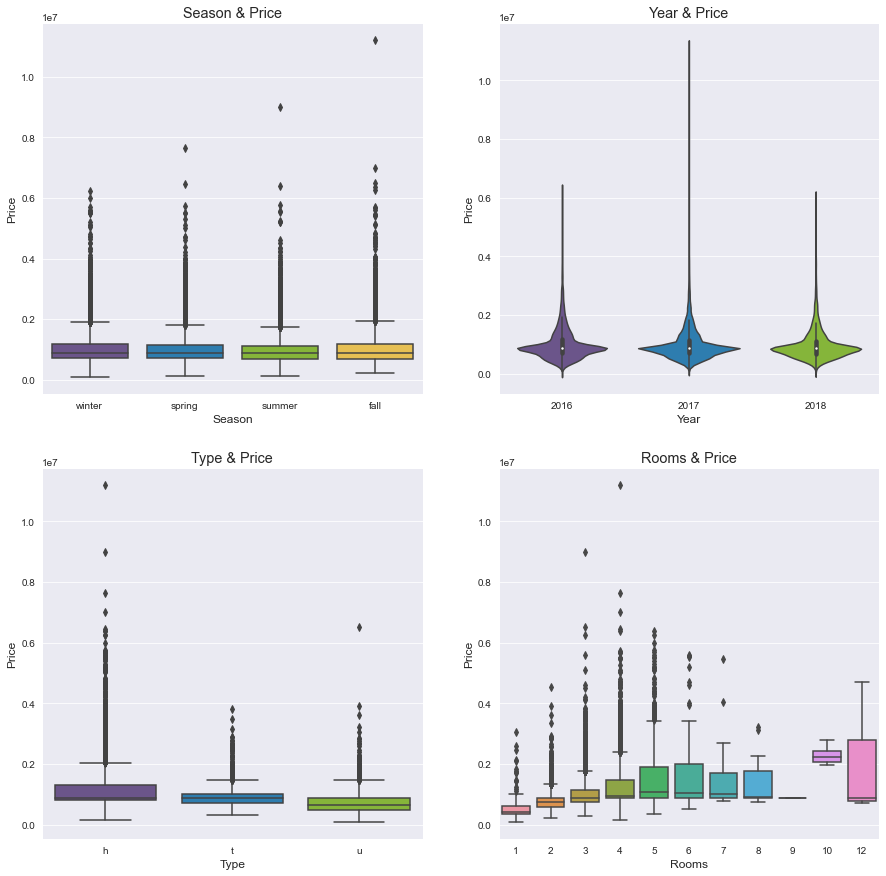

In [39]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = housing, x = 'season', y = 'Price', ax = axes[0, 0])
axes[0,0].set_xlabel('Season')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Season & Price')

# Plot [0,1]
sns.violinplot(data = housing, x = 'Year', y = 'Price', ax = axes[0, 1])
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Year & Price')

# Plot [1,0]
sns.boxplot(x = 'Type', y = 'Price', data = housing, ax = axes[1,0])
axes[1,0].set_xlabel('Type')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Type & Price')

# Plot [1,1]
sns.boxplot(x = 'Rooms', y = 'Price', data = housing, ax = axes[1,1])
axes[1,1].set_xlabel('Rooms')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Rooms & Price')

- Regarding season, there is no big diffence in price between houses sold on different parts of the year;
- As for years, 2017 was the best year for the market, with apparently more high price outliers. 2018 has less activity, perhaps because data collection did not include the whole year.
- It seems that there is a slight linear increase in Price for more rooms. Note that not all the levels of variable rooms are very stable, with 9 showing very little variability (they surely have few cases).
- Type of house may be an important indicator for price, as is seems that h (cottages) cost more, and have more variability in price.

Text(0, 0.5, 'Price')

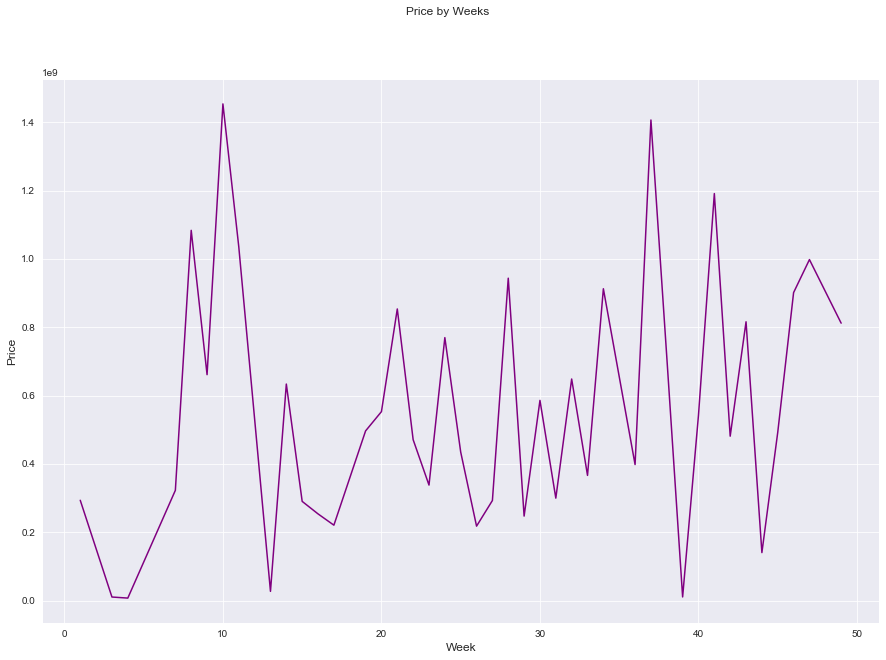

In [40]:
import calendar
# create new column storing the month of each operation
housing['week'] = housing['data'].dt.week
#use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= housing.groupby('week')['Price'].sum()
#plot figure
plt.figure(figsize=(15,10))
plt.plot(by_month, color="purple")
plt.xlabel('Week')
plt.suptitle('Price by Weeks')
plt.ylabel('Price')


([<matplotlib.axis.XTick at 0x1b1df981ee0>,
 [Text(0, 0, ''),
  Text(1, 0, 'January'),
  Text(2, 0, 'February'),
  Text(3, 0, 'March'),
  Text(4, 0, 'April'),
  Text(5, 0, 'May'),
  Text(6, 0, 'June'),
  Text(7, 0, 'July'),
  Text(8, 0, 'August'),
  Text(9, 0, 'September'),
  Text(10, 0, 'October'),
  Text(11, 0, 'November'),
  Text(12, 0, 'December')])

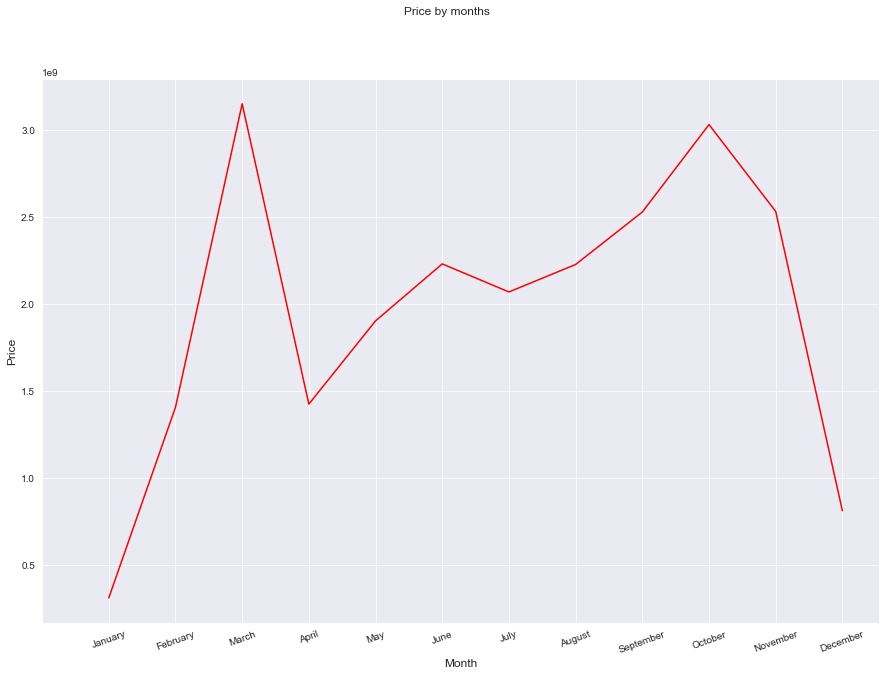

In [41]:
import calendar
# create new column storing the month of each operation
housing['month'] = housing['data'].dt.month
#use group by (alternative to pivot_table) to have the total value of houses sold per month
by_month= housing.groupby('month')['Price'].sum()
#plot figure
plt.figure(figsize=(15,10))
plt.plot(by_month, color="red")
plt.xlabel('Month')
plt.suptitle('Price by months')
plt.ylabel('Price')
plt.xticks(np.arange(13), calendar.month_name[0:13], rotation=20)

In the graph above I simply consider Price by month, similarly to what I did before with boxplots. However, we want to take into account also the year variable. The graph below shows the value of sales by month from 2016 to 2018. Note that in this case also, not all months have been profitable. In fact, only 28 months have been registered in the database, with many months in 2018 missing, as you can see from the x-axis of the graph.

[Text(552, 0, '2016-01'),
 Text(554, 0, '2016-03'),
 Text(555, 0, '2016-04'),
 Text(556, 0, '2016-05'),
 Text(557, 0, '2016-06'),
 Text(558, 0, '2016-07'),
 Text(559, 0, '2016-08'),
 Text(560, 0, '2016-09'),
 Text(561, 0, '2016-10'),
 Text(562, 0, '2016-11'),
 Text(563, 0, '2016-12'),
 Text(564, 0, '2017-01'),
 Text(565, 0, '2017-02'),
 Text(566, 0, '2017-03'),
 Text(567, 0, '2017-04'),
 Text(568, 0, '2017-05'),
 Text(569, 0, '2017-06'),
 Text(570, 0, '2017-07'),
 Text(571, 0, '2017-08'),
 Text(572, 0, '2017-09'),
 Text(573, 0, '2017-10'),
 Text(574, 0, '2017-11'),
 Text(575, 0, '2017-12'),
 Text(576, 0, '2018-01'),
 Text(577, 0, '2018-02'),
 Text(578, 0, '2018-03'),
 Text(581, 0, '2018-06'),
 Text(585, 0, '2018-10')]

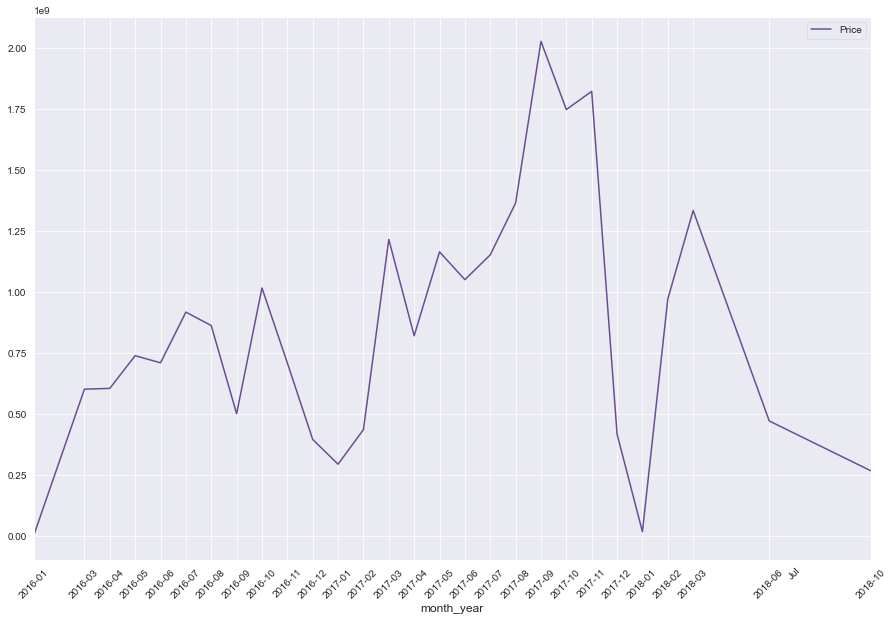

In [42]:
#create index month-year
housing['month_year'] = housing['data'].dt.to_period('M')
#use groupby to compute the price for each available month, then store the result in a dataframe
by_year_month= pd.Series.to_frame(housing.groupby('month_year')['Price'].sum())
#draw graph
fig, ax = plt.subplots(figsize=(15,10))
by_year_month.plot(ax=ax, xticks=by_year_month.index, rot=45)
ax.set_xticklabels(by_year_month.index)

## Correlation Matrix and Scatterplots

<AxesSubplot:>

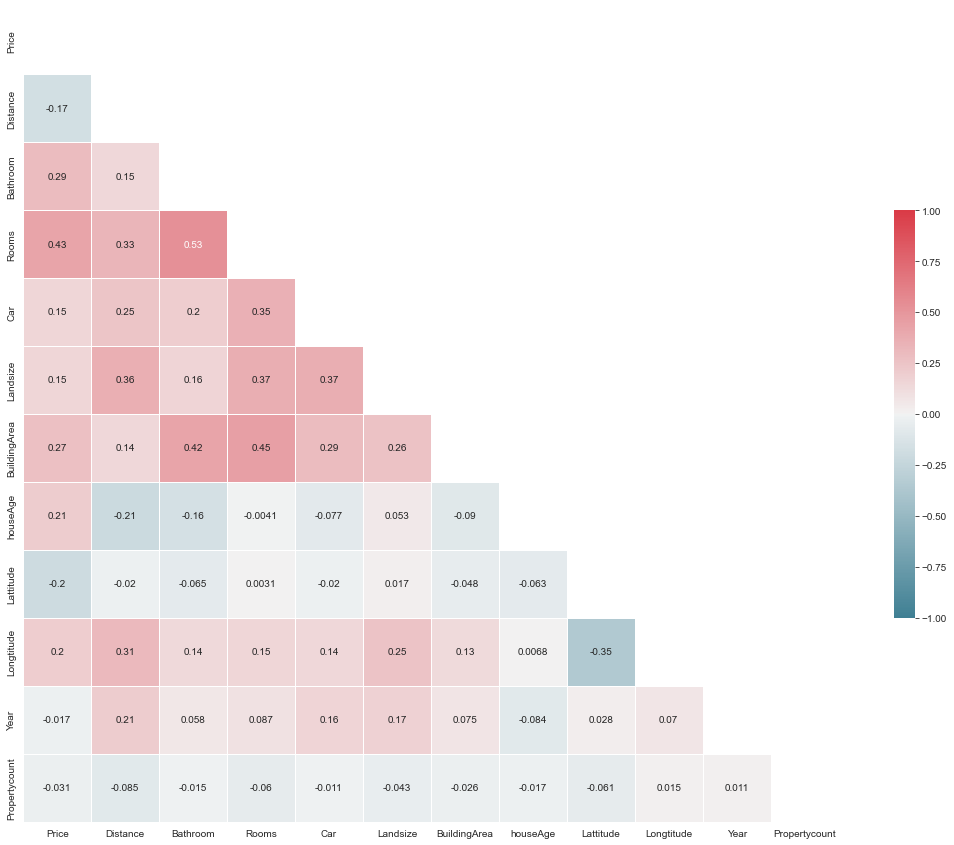

In [43]:
#select only the data we are interested in
attributes= ['Price', 'Distance', 'Bathroom', 'Rooms', 'Car', 'Landsize', 'BuildingArea', 'houseAge', 'Lattitude', 'Longtitude', 
             'Year', 'Propertycount']
h = housing[attributes]

#whitegrid
sns.set_style('whitegrid')
#compute correlation matrix...
corr_matrix=h.corr(method='spearman')
#...and show it with a heatmap
#first define the dimension
plt.figure(figsize=(20,15))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, center=0, vmax=1, vmin =-1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I will now examine the relationship between Price and four other variables:

- BuildingArea (r= .26)
- HouseAge (.21)
- Bathroom (.29)
- Rooms - This is the strongest relationship (.43).
- Distance - most negative correlation (-.17)
- Latitude (-.2)

<AxesSubplot:xlabel='Lattitude', ylabel='Price'>

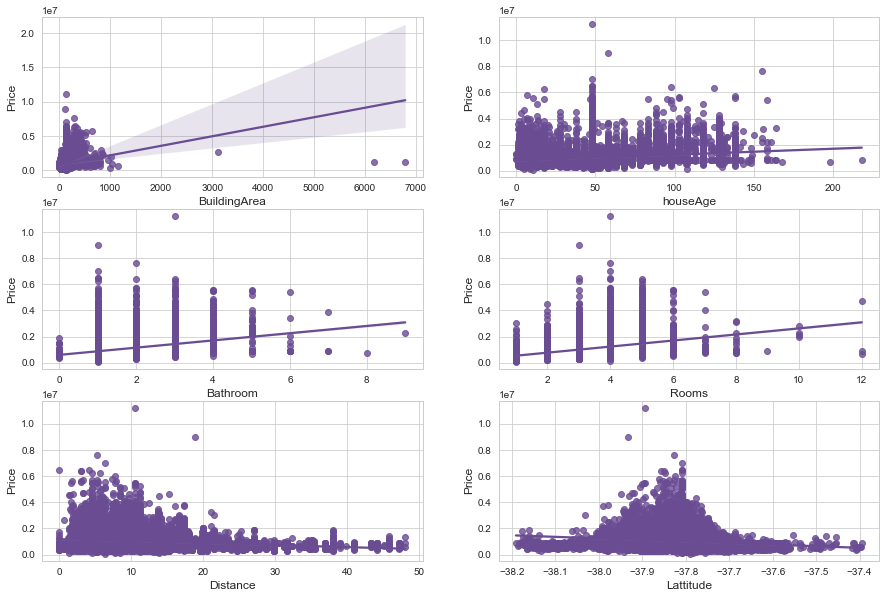

In [44]:
f, axes = plt.subplots(3, 2, figsize = (15,10))
sns.regplot(data= housing, x='BuildingArea', y='Price', ax = axes[0, 0])
sns.regplot(data= housing, x='houseAge', y='Price', ax = axes[0, 1])
sns.regplot(data= housing, x='Bathroom', y='Price', ax = axes[1, 0])
sns.regplot(data= housing, x='Rooms', y='Price', ax = axes[1, 1])
sns.regplot(data= housing, x='Distance', y='Price', ax = axes[2, 0])
sns.regplot(data= housing, x='Lattitude', y='Price', ax = axes[2, 1])

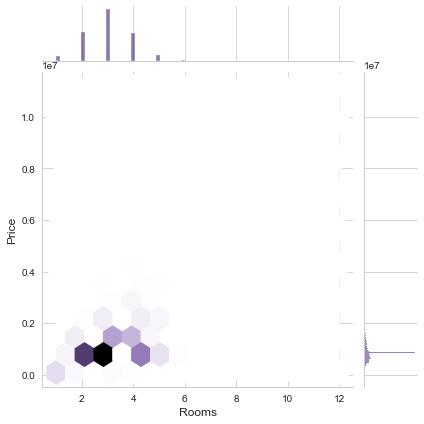

In [45]:
sns.jointplot(y='Price', x='Rooms', data=housing, kind='hex', gridsize=15)

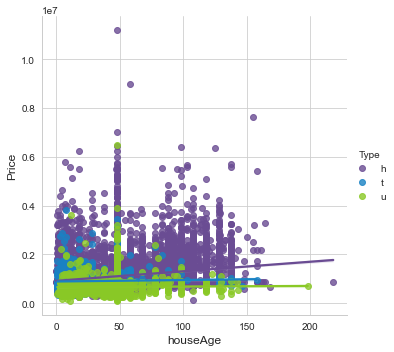

In [46]:
sns.lmplot(data= housing, x='houseAge', y= 'Price', hue= 'Type')

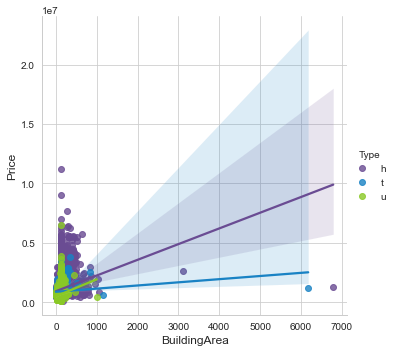

In [47]:
sns.lmplot(data= housing, x='BuildingArea', y= 'Price', hue='Type')

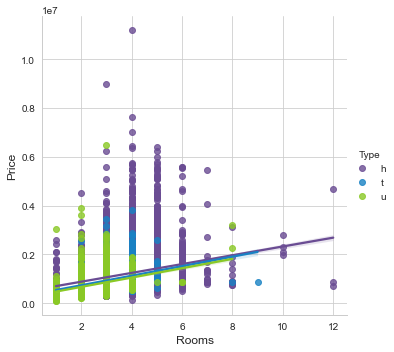

In [48]:
sns.lmplot(data= housing, x='Rooms', y= 'Price', hue='Type')

It seems that there is an interaction between type of house and its age to determine the price: as the house gets older, the price increases on average, but this is particularly true for Type h, that is cottages and villas. A similar interaction is shown in the second graph, where we see that the price steeply increases for larger properties (bigger BuildingArea), but not for the townhouse Type. On the contrary, Type does not seem to influence the relationship between price and rooms: the more rooms, the better. I would have expected the same result as in BuildingArea.

# Geographical Data

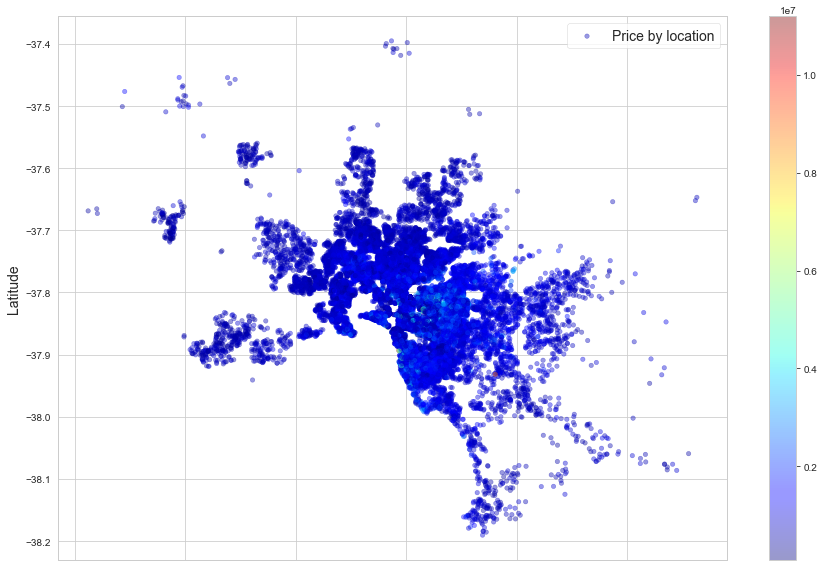

In [49]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

This plot is quite confusing, because most values are in the low end of the Price range and they turn out as blue. Perhaps it would be better to first delete the most extreme outliers (let's say 5 std from the mean) and then plot the figure? I also tried normalising the price variable (with log transformation and standard scaler) but this resulted in a completely green map, that is a map dominated by middle values.

In [50]:
housing['Price_cut']= housing['Price'].loc[housing.Price < (housing.Price.mean() + 5*housing.Price.std())]

Text(0.5, 1.0, 'AFTER CUT')

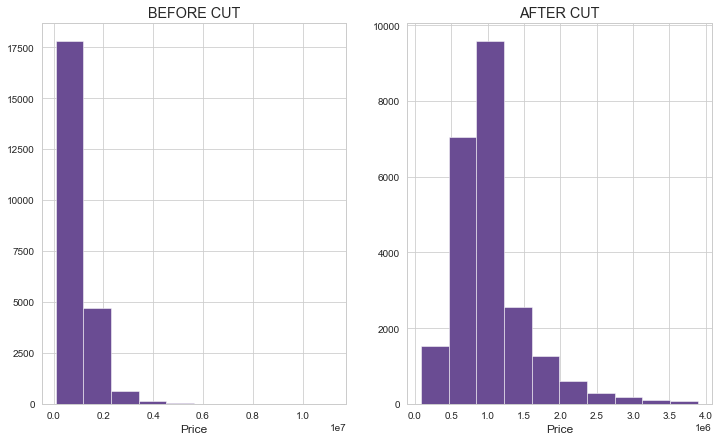

In [51]:
f, axes = plt.subplots(1,2, figsize = (12,7))
# Plot [0,0] full price
housing['Price'].hist(ax = axes[0])
axes[0].set_title('BEFORE CUT')
axes[0].set_xlabel('Price')
# Plot [0,1] price cut
housing['Price_cut'].hist(ax = axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('AFTER CUT')

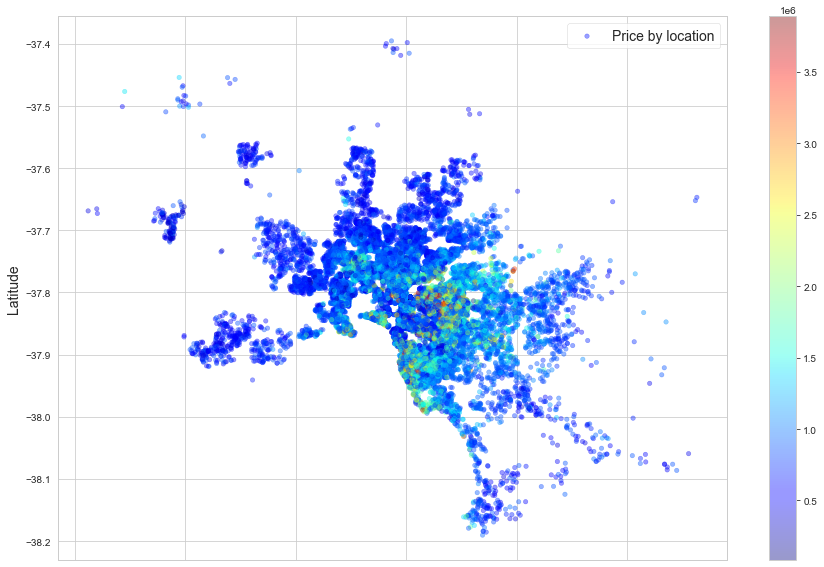

In [52]:
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4,
c=housing.Price_cut, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

This map let us see that most expensive properties are in a central area not too far from what I think is the sea. Next step would be to superimpose on this scatterplot a real map of the city.

In [53]:
img=plt.imread("melbourne.png")

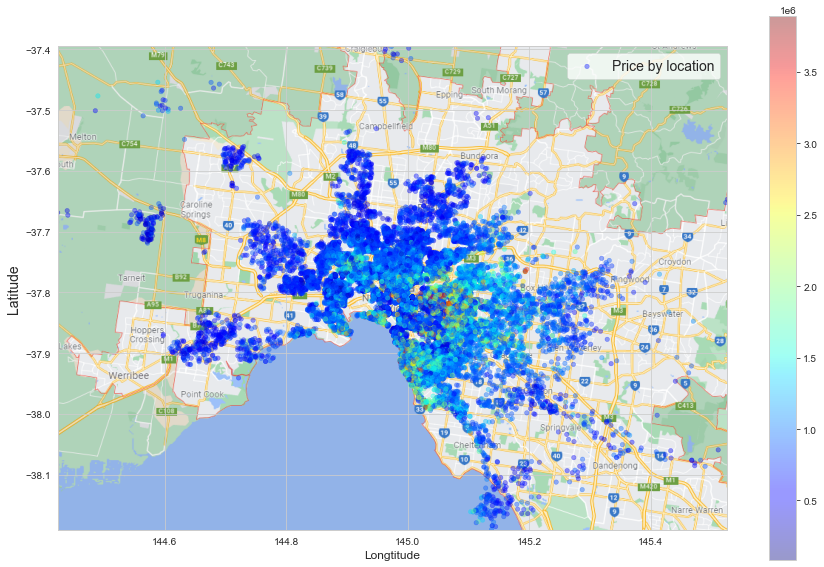

In [54]:
plt.figure(figsize=(15,10))

plt.imshow(img,zorder=0,extent=[housing['Longtitude'].min(),housing['Longtitude'].max(),housing['Lattitude'].min(),housing['Lattitude'].max()])
ax = plt.gca()
housing.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=0.4, ax=ax,
c=housing.Price_cut, cmap=plt.get_cmap("jet"), label= 'Price by location', figsize=(15,10)) 
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)

# Machine Learning

In [55]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23302 entries, 33169 to 15795
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              23302 non-null  int64         
 1   Suburb             23302 non-null  object        
 2   Address            23302 non-null  object        
 3   Rooms              23302 non-null  int64         
 4   Type               23302 non-null  object        
 5   Price              23302 non-null  float64       
 6   Method             23302 non-null  object        
 7   SellerG            23302 non-null  object        
 8   Date               23302 non-null  object        
 9   Distance           23302 non-null  float64       
 10  Postcode           23302 non-null  float64       
 11  Bathroom           23302 non-null  int32         
 12  Car                23302 non-null  int32         
 13  Landsize           23302 non-null  float64       
 14  Bu

In [56]:
#dummy variable
hD= pd.get_dummies(housing, columns= ['Type', 'Regionname', 'season'])
#drop useless variables
hD= hD.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea', 'isOutlierPrice', 'isOutlierDistance',
            'YearBuilt', 'data', 'doy', 'month', 'month_year', 'Price_cut'], axis=1)
#check variables
hD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23302 entries, 33169 to 15795
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  23302 non-null  int64  
 1   Rooms                                  23302 non-null  int64  
 2   Price                                  23302 non-null  float64
 3   Distance                               23302 non-null  float64
 4   Bathroom                               23302 non-null  int32  
 5   Car                                    23302 non-null  int32  
 6   Landsize                               23302 non-null  float64
 7   BuildingArea                           23302 non-null  float64
 8   Lattitude                              23302 non-null  float64
 9   Longtitude                             23302 non-null  float64
 10  Propertycount                          23302 non-null  float64
 11

#### Feature Scaling

Our features have very different scales: room ranges from 1 to 16, while Price is in the range of millions. this difference can hinder the performance of our ML algorithms. I will thus apply a scaling algorithm. In this scenario is probably best to implement a robust scaling, which is not bound to Gaussian distribution of features and can deal with outliers, instead of the more common standard scaler or min-max scaling. This resource explains really well all the available options and their statistical meaning. For a still more detailed explanation, this scikit-learn page is very interesting.

In [57]:
#create x and y variables
X = hD.drop("Price", axis=1)
y = hD["Price"].copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
hD= scaler.fit_transform(hD.astype(np.float64))

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = .33, random_state= 42)

Now finally I will try to predict price using three basic ML methods: linear regression, XGBoost and random forest. I will first prepare the inputs (feature scaling and one-hot encoding), then I will apply the models to the train set. RMSE will be the major metrics to evaluate the performances of the models. Cross-validation will also be used to select the best performing model, which I will then fine tune.

In [59]:
from xgboost import XGBRegressor

#fit XGBoost
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [60]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('XGBoost', XGB)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 439311.82
RMSE of random forest = 157602.25
RMSE of XGBoost = 253481.36


In [61]:
# We can use the Mean absolute percentage error (MAPE) to compute a measure of accuracy that is more immediate to understand.

for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 71.23 %
Accuracy of random forest= 90.72 %
Accuracy of XGBoost= 82.73 %


### Model Comparison

In [62]:
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

In [63]:
#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored XGBoost x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [64]:
#this is an example of the stored results
results[8] # XGBoost x R2

{'fit_time': array([0.80085897, 0.831285  , 0.85921144, 0.83479834, 0.85871863,
        0.85721707, 0.82679033, 0.80185676, 0.8043611 , 0.84873104]),
 'score_time': array([0.0039897 , 0.00398946, 0.0039897 , 0.00398946, 0.00299239,
        0.0039897 , 0.00398898, 0.00398922, 0.0039897 , 0.00398922]),
 'test_score': array([0.48532836, 0.41617215, 0.3611774 , 0.37911752, 0.45169941,
        0.44049126, 0.45639065, 0.40461064, 0.41797887, 0.37825477]),
 'train_score': array([0.80604425, 0.81836031, 0.80810218, 0.80642739, 0.8096642 ,
        0.81161462, 0.81170544, 0.81215765, 0.80486591, 0.81164641])}

In [65]:
#THIS IS FOR Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()
# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
XGB_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
XGB_RMSE_std= results[6]['test_score'].std()
XGB_MAE_mean = -results[7]['test_score'].mean()
XGB_MAE_std= results[7]['test_score'].std()
XGB_r2_mean = results[8]['test_score'].mean()
XGB_r2_std = results[8]['test_score'].std()

In [66]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, XGB_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, XGB_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, XGB_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, XGB_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, XGB_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, XGB_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)

,Model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,r2_mean,r2_std
1,Random Forest,423053.754087,1.325012e+10,251613.503167,7220.853608,0.432397,0.041010
2,XGBoost,429444.341602,1.910938e+10,250888.003485,9532.992410,0.419122,0.037602
0,Linear Regression,441074.196723,2.445447e+10,282301.850616,8955.817908,0.389901,0.023634


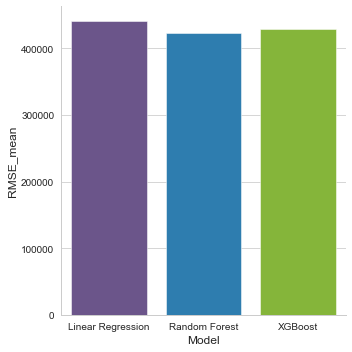

In [67]:
sns.catplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True')

Now linear regression is not so good in comparison with the other two methods, both in terms of error and variance explained. The best model is random forest, though I must say that I expected XGBoost to outperform Random Forests. In any case, let's proceed with fine tuning our random forest and XGBoost.

### Fine-tuning Random Forest

#### a. Grid Search

Most important hyperparameters of Random Forest:

- n_estimators = n of trees
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

As for how I decided the numbers to try I simply followed the advice of Aurelion Geron (2017): 'When you have no idea what value a hyperparameter should have, a simple approach is to try out consecutive powers of 10 (or a smaller number if you want a more fine-grained search)'.

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(forest, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [69]:
# now let's how the RMSE changes for each parameter configuration

cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

424440.5574060242 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
418404.2012281051 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
419567.0506309563 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
415384.98305952386 {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
428676.12828210054 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
422401.8397094039 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
437804.26113324217 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
428243.1890432182 {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
432205.3808008677 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
421059.2114501772 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
433849.40580677654 {'bootstrap': True, 'max_depth

In [70]:
#find the best model of grid search

grid_search_forest.best_estimator_

RandomForestRegressor(max_depth=10, max_features=10, n_estimators=25, n_jobs=-1)

In [71]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(x_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of 77.89 %


In [72]:
grid_mse = mean_squared_error(y_train, grid_best)
grid_rmse = np.sqrt(grid_mse)
print('The best model from the grid search has a RMSE of', round(grid_rmse, 2))

The best model from the grid search has a RMSE of 341453.39


#### Randomized Search

The grid search is often too costly, as many combinations are tested. In these cases it is easier to use a randomized search, that evaluates only a user defined number of random combinations of each hyperparameter at every iteration. This way we could also test more hyperparameters

In [73]:
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [74]:
# Use the random grid to search for best hyperparameters

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
cvres2 = rf_random.cv_results_

for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

534088.2009929046 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
533451.1078991549 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
410037.7157864983 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
424752.5638038914 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
527163.6911751555 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
411352.34146297956 {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
410070.6473433769 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
417737.05251009634 {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
527109.3861848025 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
408951.938667937 {'n_estimators': 110, 'min_samples_split

In [76]:
print("Best RMSE is %.4f" % min(np.sqrt(-cvres2["mean_test_score"])))

Best RMSE is 408951.9387


In [77]:
print(f"Best Random Model: {rf_random.best_estimator_}")

Best Random Model: RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=10,
                      n_estimators=110, n_jobs=-1)


In [78]:
print(f"Best Combination of parameters of Random Search: {rf_random.best_params_}")

Best Combination of parameters of Random Search: {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 45}


In [79]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_train)
errors = abs(random_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of 83.53 %


In [80]:
#this is the RMSE
final_mse = mean_squared_error(y_train, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 276190.14


In conclusion, the metrics for our best models on the training set after our hyperparameter fine-tuning are the following:

Grid-search:
- RMSE: 326991.51
- accuracy (MAPE): 78.69 %

Randomized Search:
- RMSE: 275352.18
- accuracy: 83.53 %

This of course does not mean that the grid-search is inherently inferior to randomized search. It's just that in this notebook I used the information provided by the former to refine the latter. Moreover, I tested more combinations with the randomized search. In any case, this time I will consider the model obtained by the randomized search as the best one. First I will plot the feature importance for this model. This will give me precious insight to the most important factor in predicting our dependent variable Price. Then I will apply the model to the test set.

#### Feature Importance

In [81]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance = list(df['importance'])
feature = list(df['feature'])

#see df
print(df)

    importance                                feature
0     0.112596                               Distance
1     0.099259                                  Rooms
2     0.082060                              Lattitude
3     0.080543       Regionname_Southern Metropolitan
4     0.071867                             Longtitude
5     0.071181                           BuildingArea
6     0.068495                               Landsize
7     0.052846                                 Type_h
8     0.052303                                  index
9     0.049366                                 Type_u
10    0.049330                               Bathroom
11    0.048559                          Propertycount
12    0.042290                               houseAge
13    0.034328                                   week
14    0.021254                                    Car
15    0.012643        Regionname_Western Metropolitan
16    0.008717       Regionname_Northern Metropolitan
17    0.008439              

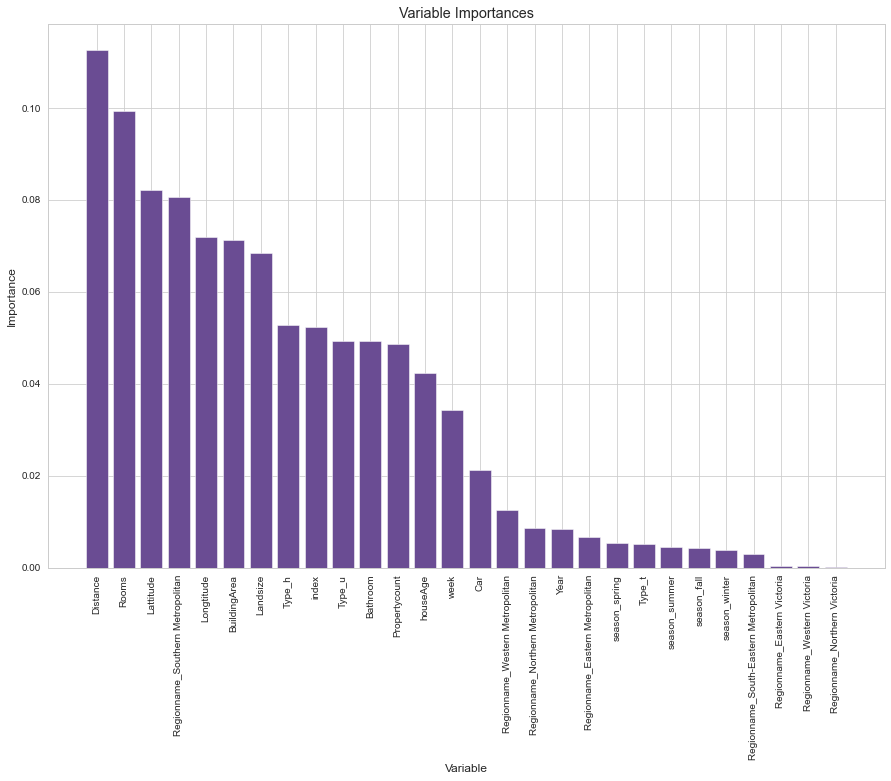

In [82]:
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Evaluate best model on the test set

In [83]:
final_model = rf_random.best_estimator_
# Predicting test set results
final_pred = final_model.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_mse)
print('The final RMSE on the test set is', round(final_rmse, 2))

The final RMSE on the test set is 430308.95


In [84]:
#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 75.53 %


### Visualise Random Forest Hyperparameters

##### max_depth

Max_depth indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. In our search we considered a depth ranging from 1 to 50 on the training set. Let's compare the training result with the test result.

Text(0.5, 0, 'Tree depth')

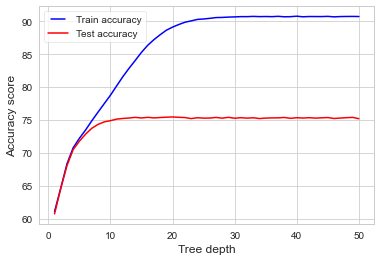

In [85]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')

### XGBoost Hyperparameter Tuning

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

##### n_estimators and early_stopping_rounds
n_estimators specifies how many times to go through the modeling cycle described above.

Too low a value causes underfitting, which is inaccurate predictions on both training data and new data. Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about). You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate discussed below.

The argument early_stopping_rounds offers a way to automatically find the ideal value. Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. early_stopping_rounds = 5 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

Here is the code to fit with early_stopping:

In [86]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
final_pred = my_model.predict(x_test)

#calculate accuracy
errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 74.97 %


When using early_stopping_rounds, you need to set aside some of your data for checking the number of rounds to use. If you later want to fit a model with all of your data, set n_estimators to whatever value you found to be optimal when run with early stopping.

##### learning_rate

Here's a subtle but important trick for better XGBoost models:

Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in. This means each tree we add to the ensemble helps us less. In practice, this reduces the model's propensity to overfit.

So, you can use a higher value of n_estimators without overfitting. If you use early stopping, the appropriate number of trees will be set automatically.

In general, a small learning rate (and large number of estimators) will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

Modifying the example above to include a learning rate would yield the following code:

In [88]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
#calculate accuracy
final_pred = my_model.predict(x_test)

errors = abs(final_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model achieves on the test set an accuracy of', round(accuracy, 2),'%')

The best model achieves on the test set an accuracy of 75.37 %


## Bayesian Optimisation with hyperopt

- Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

- Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

- In this process, we train the model with various possible range of parameters until a best fit model is obtained.

- Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.

- In this section, we discuss one of the most accurate and successful hyperparameter tuning method, which is Bayesian Optimization with HYPEROPT.

HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

More information on Hyperopt can be found at the following link:-

https://hyperopt.github.io/hyperopt/?source=post_page

In [90]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [98]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 10,
        'seed': 0
    }

The available hyperopt optimization algorithms are -

- hp.choice(label, options) — Returns one of the options, which should be a list or tuple.

- hp.randint(label, upper) — Returns a random integer between the range [0, upper).

- hp.uniform(label, low, high) — Returns a value uniformly between low and high.

- hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

- hp.normal(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

In [99]:
def objective(space):
    clf=XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }


In [100]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

job exception: [17:07:12] ..\src\metric\rank_metric.cc:233: Check failed: dat[1] > 0.0f (0 vs. 0) : AUC: the dataset only contains pos or neg samples



  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]


XGBoostError: [17:07:12] ..\src\metric\rank_metric.cc:233: Check failed: dat[1] > 0.0f (0 vs. 0) : AUC: the dataset only contains pos or neg samples